Just a work in Progress!

Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.



In [57]:
import numpy as np
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cbook as cbook
import seaborn as sns
%matplotlib inline

In [58]:
df = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)
df.columns = ['Feedback','Binary']
df.head()

,Feedback,Binary
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [59]:
keywords = ['Excellent','great','good']

for key in keywords:
    df[str(key)]= df.Feedback.str.contains(
    ''+ str(key) +'',
        case=False
    )
    
df[str(key)].head() 

0    False
1     True
2    False
3    False
4    False
Name: good, dtype: bool

In [60]:
df['allcaps'] = df.Feedback.str.isupper()
df['allcaps'].head()

0    False
1    False
2    False
3    False
4    False
Name: allcaps, dtype: bool

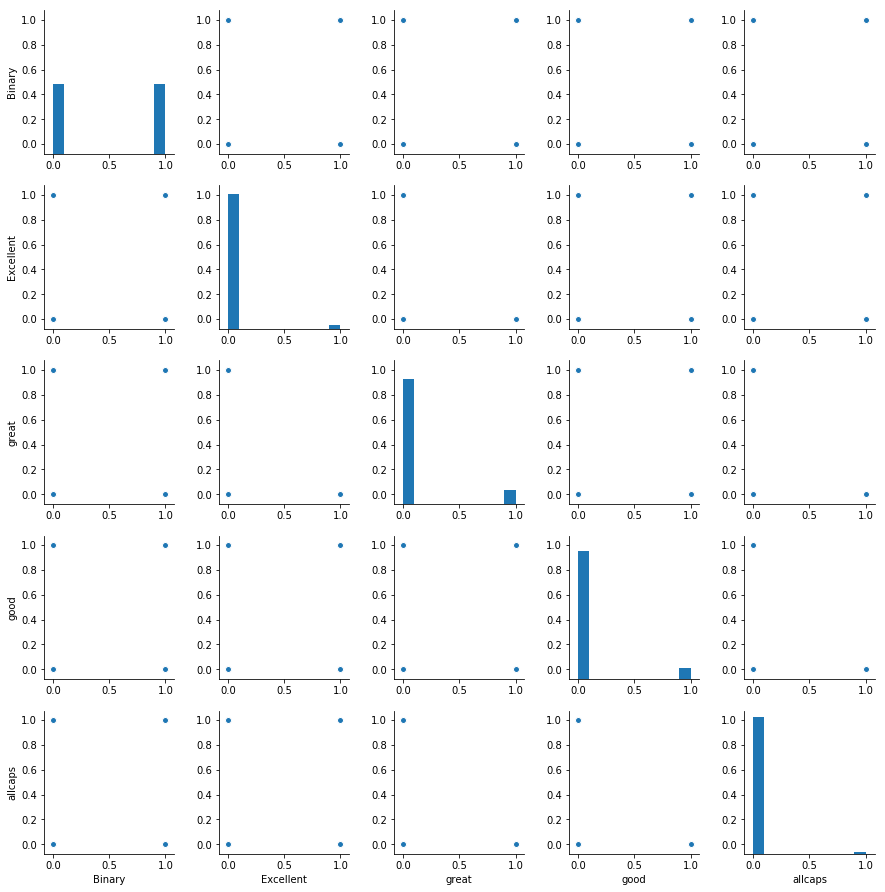

In [61]:
sns.pairplot(df)

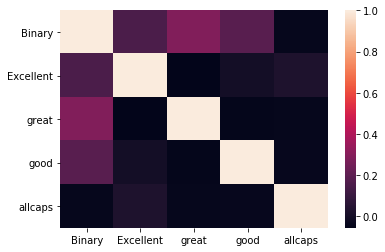

In [62]:
sns.heatmap(df.corr())

In [63]:
data = df[keywords + ['allcaps']]
target = df['Binary']

In [64]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of labeled points out of a total {} points : {}".format(
    data.shape[0],
    (target == y_pred).sum()
))


Number of labeled points out of a total 1000 points : 654


In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(target, y_pred)

0.65400000000000003

In [66]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier


import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [67]:
train, test = train_test_split(df,test_size = 0.1)
train, test

(                                              Feedback  Binary  Excellent  \
 915  So I had to take the battery out of the phone ...       0      False   
 199                        useless phone, simply deaf.       0      False   
 944  I does not maintain a connection with the comp...       0      False   
 472  Disappointment.. I hate anything that goes in ...       0      False   
 547  Trying to make a call on these is an exercise ...       0      False   
 571                       This fixes all the problems.       1      False   
 608   It is cheap, and it feel and look just as cheap.       0      False   
 628  Case was more or less an extra that I original...       0      False   
 767  I really wanted the Plantronics 510 to be the ...       0      False   
 295   This is hands down the best phone I've ever had.       1      False   
 841  the only VERY DISAPPOINTING thing was there wa...       0      False   
 353  Their network coverage in Los Angeles is horri...       0 

In [68]:
a=1
b=0

train_pos = train[ train['Binary'] == int(a)]
train_pos = train_pos['Feedback']
train_neg = train[ train['Binary'] == int(b)]
train_neg = train_neg['Feedback']


In [69]:
train_pos = train[ train['Binary'] == int(a)]
train_pos.head()

,Feedback,Binary,Excellent,great,good,allcaps
571,This fixes all the problems.,1,False,False,False,False
295,This is hands down the best phone I've ever had.,1,False,False,False,False
793,I bought this battery with a coupon from Amazo...,1,False,False,False,False
776,I highly recommend this case.,1,False,False,False,False
136,Very good stuff for the price.,1,False,False,True,False


In [70]:
train_neg = train[ train['Binary'] == int(b)]
train_neg.head()

,Feedback,Binary,Excellent,great,good,allcaps
915,So I had to take the battery out of the phone ...,0,False,False,False,False
199,"useless phone, simply deaf.",0,False,False,False,False
944,I does not maintain a connection with the comp...,0,False,False,False,False
472,Disappointment.. I hate anything that goes in ...,0,False,False,False,False
547,Trying to make a call on these is an exercise ...,0,False,False,False,False


In [71]:
c=1
d=0

test_pos = test[ test['Binary'] == int(c)]
test_pos = test_pos['Feedback']
test_neg = test[ test['Binary'] == int(d)]
test_neg = test_neg['Feedback']


In [72]:
c=1
d=0

test_pos = test[ test['Binary'] == int(c)]
test_neg = test[ test['Binary'] == int(d)]
test_pos.head()


,Feedback,Binary,Excellent,great,good,allcaps
398,"Sounds good reasonably priced and effective, I...",1,False,False,True,False
332,The reception is excellent!,1,True,False,False,False
452,My colleague & I now get great reception.A lit...,1,False,True,False,False
369,I was looking for this headset for a long time...,1,False,False,False,False
609,It fits my ear well and is comfortable on.,1,False,False,False,False


In [73]:
test_neg.head(5)

,Feedback,Binary,Excellent,great,good,allcaps
169,One thing I hate is the mode set button at the...,0,False,False,False,False
531,They refuse to refund or replace.,0,False,False,False,False
601,"The real killer is the volume, and of course i...",0,False,False,False,False
824,Awkward to use and unreliable.,0,False,False,False,False
60,Essentially you can forget Microsoft's tech su...,0,False,False,False,False


In [74]:
type('Binary')

str

In [75]:
print('[Negative]: %s/%s '  % (len(test_neg),train_neg))        
print('[Positive]: %s/%s '  % (len(test_pos),train_pos))  
 

[Negative]: 50/                                              Feedback  Binary  Excellent  \
915  So I had to take the battery out of the phone ...       0      False   
199                        useless phone, simply deaf.       0      False   
944  I does not maintain a connection with the comp...       0      False   
472  Disappointment.. I hate anything that goes in ...       0      False   
547  Trying to make a call on these is an exercise ...       0      False   
608   It is cheap, and it feel and look just as cheap.       0      False   
628  Case was more or less an extra that I original...       0      False   
767  I really wanted the Plantronics 510 to be the ...       0      False   
841  the only VERY DISAPPOINTING thing was there wa...       0      False   
353  Their network coverage in Los Angeles is horri...       0      False   
293                        DO NOT PURCHASE THIS PHONE.       0      False   
134                       Buyer--Be Very Careful!!!!!.       

## Challenge: Iterate and evaluate your classifier


It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

Do any of your classifiers seem to overfit?
Which seem to perform the best? Why?
Which features seemed to be most impactful to performance?
Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

In [76]:
from sklearn.cross_validation import train_test_split
df.columns

Index(['Feedback', 'Binary', 'Excellent', 'great', 'good', 'allcaps'], dtype='object')

In [77]:
X= df[['Excellent', 'great', 'good', 'allcaps']]

In [78]:
y= df['Binary']

In [79]:
from sklearn.cross_validation import train_test_split

In [80]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=101)

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lm= LinearRegression()

In [83]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
print(lm.intercept_)

0.432312234451


In [85]:
lm.coef_

array([ 0.48680551,  0.52021817,  0.41781118, -0.05621269])

In [86]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Excellent,0.486806
great,0.520218
good,0.417811
allcaps,-0.056213


In [87]:
predictions = lm.predict(X_test)

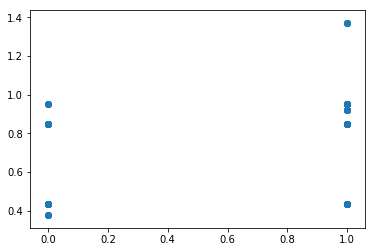

In [88]:
plt.scatter(y_test,predictions)

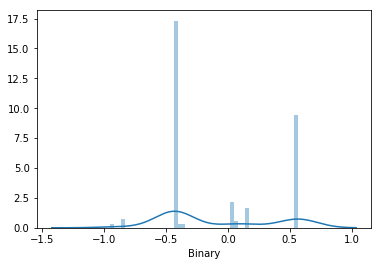

In [89]:
sns.distplot((y_test-predictions),bins=50);

In [90]:
from sklearn import metrics

In [91]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.439254038012
MSE: 0.220919479331
RMSE: 0.470020722236
